In [1]:
from pandas import read_csv
from matplotlib import pyplot
import sys
import numpy as np
import pandas as pd
from datetime import datetime
from keras.utils import to_categorical


In [2]:
colors = ['#BB0000', '#0000BB', 'green','red', 'yellow', 'pink']

def prinUserSensorData(dataS, label,s):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    #print(dataS.shape)
    for t in range(0,dataS.shape[0]):
        ts.append(dataS[t][0])
    df['Time']=ts
    #print(ts)
#    for s in range(1,dataS.shape[1]):
    ls.append(label+" #column-"+str(s))
    #print(dataS[:,s].shape)
    df[label+" #column-"+str(s)]=dataS[:,s]

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,5), color=colors[s-1])    
    


In [3]:
import numpy as np

folder = "./data"

users = ["Beret"]
files = ["diagonal1", "diagonal2", "doublepoling1", "doublepoling2", "herringbone1", "herringbone2", "kickdoublepoling1", "kickdoublepoling2"]


cross = [0, 1, 0, 1, 0, 1, 0, 1]

sensors = ["s1", "s2"]

tW = list(range(-2500,100, 50))

print(tW)
print(len(tW))

tStep = 150

index_t = 0

def getAVG(vs):
    if len(vs) == 0:
        return 0
    if np.isnan(np.median(vs)):
        return -1
    return np.median(vs)

def smoothData(data):
    for ix in range(1, 6):
        data[:, ix] = data[:, ix].astype(float)
        lastV = 0.0
        for jx in range(len(data[:, ix])):
            data[jx, ix] = data[jx, ix] * 0.2 + lastV * 0.8
            lastV = data[jx, ix]

def smoothDataTime(data):
    data[:, 0] = data[:, 0].astype(float)
    tA = []
    lastT = -1
    for jx in range(len(data[:, 0])):
        t0 = data[jx, 0]
        if t0 > lastT + 50:
            lastT = t0
            tA.append(t0)
    retV = np.zeros((len(tA), 7))
    for ix in range(1, 7):
        data[:, ix] = data[:, ix].astype(float)
        lastT = -1
        lV = []
        vA = []
        for jx in range(len(data[:, ix])):
            t0 = data[jx, 0]
            if t0 > lastT + 50:
                lastT = t0
                vA.append(np.median(lV))
                lV = []
            else:
                lV.append(data[jx, ix])
        retV[:, ix] = np.array(vA)
    retV[:, 0] = np.array(tA)
    return retV

def cleanDataFile(filename):
    ret = []
    count = 0
    with open(filename) as file:
        next(file)
        for line0 in file:
            count += 1
            line = line0.strip()
            line = line.replace(',', '.').split('\t')
            if len(line) != 7:
                print("NOT 7# in ", count, " -> ", line)
                continue
            try:
                ret.append([float(x) for x in line])
            except ValueError as e:
                print("Error in line ", line, ":", e)
    return ret

def getLabels(t0, labels):
    for l in labels:
        if l[0] <= t0 <= l[1]:
            return l[2]
    return None


[-2500, -2450, -2400, -2350, -2300, -2250, -2200, -2150, -2100, -2050, -2000, -1950, -1900, -1850, -1800, -1750, -1700, -1650, -1600, -1550, -1500, -1450, -1400, -1350, -1300, -1250, -1200, -1150, -1100, -1050, -1000, -950, -900, -850, -800, -750, -700, -650, -600, -550, -500, -450, -400, -350, -300, -250, -200, -150, -100, -50, 0, 50]
52


In [4]:
#for ixu,us in enumerate(users):    
    #for ixc,cl in enumerate(files):
            #for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                #print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                #data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                #data=np.array(data)
                #print(data.shape)
                #data=smoothDataTime(data)
                #print(data.shape)
                #for s in range(1,7):
                #    prinUserSensorData(data, "us:"+us+"file:"+cl+"#sensor:"+sn,s)

In [5]:
X=[]
Y=[]
S=[]
N=0



for ixu,us in enumerate(users):    
    for ixc,cl in enumerate(files):
            t0=0
            tMaxMin=sys.maxsize 
            interval=False
            #idx_sensor={}
            sensorData={}
            for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=np.array(data)
                smoothData(data)
                #prinUserSensorData(data)
                sensorData[sn]=data
                tMax=0
                tMin=sys.maxsize 
                for ixd,d in enumerate(data):
                    #idx_sensor[sn].append(ixd)
                    if(d[index_t]>tMax):
                        tMax=d[index_t]
                    if(d[index_t]<tMin):
                        tMin=d[index_t]                        
                tMaxMin=min(tMaxMin,tMax-tMin)
                
            labels=read_csv(folder+"/"+us+"/"+cl+"/info.txt", sep="\t",parse_dates=True,header=None, decimal=".")
            labels=labels.values
            print(labels)
            
            tMaxMin=int(tMaxMin)
            print(cl," tMaxMin:",tMaxMin)
                        
            for t in range(0-min(tW),tMaxMin-max(tW),tStep):
                print(t/(tMaxMin-max(tW))*100, "t#",t)
                
                label=getLabels(t,labels)
                if (not label):
                    continue
                xi=[]
                for sn in sensors:
                    data=sensorData[sn]
                    tRef=np.min(data[:,index_t])

                    
                    xi1=[]
                    xi2=[]
                    xi3=[]
                    xi4=[]
                    xi5=[]
                    xi6=[]
                    for it in range(len(tW)-2,-1,-1):

                        tr=t+tRef+np.random.normal(0, 25)

                        t0=tr+tW[it]
                        tN=tr+tW[it+1]
                        ag1=data[np.where((data[:,index_t] >= t0) & (data[:,index_t] <=  tN))]
                        #print("\t t0,tN,#,t,it,tRef",t0,tN,len(ag1),t,it,tW[it],tRef)
                        #print("cl",cl,"sc",sc,"sn",sn,"t+:",t,"tRef:",tRef,"t0:",t0,"tN:",tN," ag1:", ag1)
                        #ag0=data[np.where((data[:,index_t] >= tr-5000) & (data[:,index_t] <=  tr+5000))]
                        
                        

                        #añadimos info sensores inerciales
                        xi1.append(getAVG(ag1[:,4].astype(float)))
                        xi2.append(getAVG(ag1[:,5].astype(float)))
                        xi3.append(getAVG(ag1[:,6].astype(float)))
                        
                        #xi4.append(getAVG(ag1[:,4].astype(np.float)))
                        #xi5.append(getAVG(ag1[:,5].astype(np.float)))
                        #xi6.append(getAVG(ag1[:,6].astype(np.float)))                        

                    #print("\t",np.array(xi1).shape)
                    xi.append(xi1)
                    xi.append(xi2)
                    xi.append(xi3)
                    #xi.append(xi4)
                    #xi.append(xi5)
                    #xi.append(xi6)

                #print("",np.array(xi).shape)    
                X.append(np.transpose(xi))
                Y.append(label)
                print(len(cross))
                S.append(cross[ixc])

        
X=np.array(X)
S=np.array(S)
Y=np.array(Y)

print(X.shape)
print(Y.shape)    
print(S.shape) 

                

./data/Beret/diagonal1/s1.txt
./data/Beret/diagonal1/s2.txt
[[28000 90000 'B-Diagonal']
 [160000 220000 'B-Diagonal']]
diagonal1  tMaxMin: 755719
0.33083267938740374 t# 2500
0.350682640150648 t# 2650
0.3705326009138922 t# 2800
0.3903825616771364 t# 2950
0.41023252244038066 t# 3100
0.4300824832036249 t# 3250
0.4499324439668691 t# 3400
0.46978240473011335 t# 3550
0.48963236549335754 t# 3700
0.5094823262566017 t# 3850
0.529332287019846 t# 4000
0.5491822477830902 t# 4150
0.5690322085463344 t# 4300
0.5888821693095786 t# 4450
0.6087321300728229 t# 4600
0.6285820908360672 t# 4750
0.6484320515993114 t# 4900
0.6682820123625556 t# 5050
0.6881319731257998 t# 5200
0.7079819338890441 t# 5350
0.7278318946522883 t# 5500
0.7476818554155324 t# 5650
0.7675318161787766 t# 5800
0.7873817769420209 t# 5950
0.8072317377052652 t# 6100
0.8270816984685094 t# 6250
0.8469316592317536 t# 6400
0.8667816199949978 t# 6550
0.8866315807582421 t# 6700
0.9064815415214863 t# 6850
0.9263315022847305 t# 7000
0.9461814630479

8
6.107171261491473 t# 46150
8
6.127021222254717 t# 46300
8
6.146871183017962 t# 46450
8
6.1667211437812055 t# 46600
8
6.18657110454445 t# 46750
8
6.206421065307694 t# 46900
8
6.226271026070938 t# 47050
8
6.246120986834183 t# 47200
8
6.265970947597427 t# 47350
8
6.285820908360671 t# 47500
8
6.305670869123915 t# 47650
8
6.32552082988716 t# 47800
8
6.345370790650404 t# 47950
8
6.3652207514136485 t# 48100
8
6.385070712176892 t# 48250
8
6.404920672940137 t# 48400
8
6.42477063370338 t# 48550
8
6.444620594466626 t# 48700
8
6.464470555229869 t# 48850
8
6.484320515993113 t# 49000
8
6.504170476756357 t# 49150
8
6.524020437519602 t# 49300
8
6.543870398282846 t# 49450
8
6.563720359046091 t# 49600
8
6.5835703198093345 t# 49750
8
6.603420280572579 t# 49900
8
6.623270241335823 t# 50050
8
6.643120202099068 t# 50200
8
6.662970162862311 t# 50350
8
6.682820123625556 t# 50500
8
6.702670084388799 t# 50650
8
6.722520045152044 t# 50800
8
6.742370005915288 t# 50950
8
6.762219966678533 t# 51100
8
6.7820699274

8
11.764410079016077 t# 88900
8
11.784260039779321 t# 89050
8
11.804110000542565 t# 89200
8
11.82395996130581 t# 89350
8
11.843809922069054 t# 89500
8
11.863659882832298 t# 89650
8
11.883509843595542 t# 89800
8
11.903359804358788 t# 89950
8
11.923209765122031 t# 90100
11.943059725885275 t# 90250
11.96290968664852 t# 90400
11.982759647411765 t# 90550
12.002609608175007 t# 90700
12.022459568938253 t# 90850
12.042309529701496 t# 91000
12.06215949046474 t# 91150
12.082009451227984 t# 91300
12.10185941199123 t# 91450
12.121709372754474 t# 91600
12.141559333517717 t# 91750
12.161409294280961 t# 91900
12.181259255044207 t# 92050
12.20110921580745 t# 92200
12.220959176570695 t# 92350
12.240809137333938 t# 92500
12.260659098097184 t# 92650
12.280509058860426 t# 92800
12.300359019623672 t# 92950
12.320208980386916 t# 93100
12.34005894115016 t# 93250
12.359908901913403 t# 93400
12.379758862676649 t# 93550
12.399608823439893 t# 93700
12.419458784203137 t# 93850
12.43930874496638 t# 94000
12.459158

8
21.312241206136548 t# 161050
8
21.332091166899794 t# 161200
8
21.35194112766304 t# 161350
8
21.37179108842628 t# 161500
8
21.391641049189523 t# 161650
8
21.411491009952773 t# 161800
8
21.431340970716015 t# 161950
8
21.451190931479257 t# 162100
8
21.471040892242502 t# 162250
8
21.490890853005748 t# 162400
8
21.51074081376899 t# 162550
8
21.530590774532236 t# 162700
8
21.550440735295478 t# 162850
8
21.570290696058724 t# 163000
8
21.59014065682197 t# 163150
8
21.60999061758521 t# 163300
8
21.629840578348457 t# 163450
8
21.649690539111702 t# 163600
8
21.669540499874945 t# 163750
8
21.68939046063819 t# 163900
8
21.709240421401436 t# 164050
8
21.729090382164678 t# 164200
8
21.748940342927924 t# 164350
8
21.768790303691166 t# 164500
8
21.78864026445441 t# 164650
8
21.808490225217657 t# 164800
8
21.8283401859809 t# 164950
8
21.84819014674414 t# 165100
8
21.86804010750739 t# 165250
8
21.887890068270632 t# 165400
8
21.907740029033874 t# 165550
8
21.92758998979712 t# 165700
8
21.947439950560366

8
26.632030690686005 t# 201250
8
26.651880651449243 t# 201400
8
26.671730612212492 t# 201550
8
26.69158057297573 t# 201700
8
26.711430533738977 t# 201850
8
26.731280494502226 t# 202000
8
26.751130455265464 t# 202150
8
26.77098041602871 t# 202300
8
26.79083037679196 t# 202450
8
26.810680337555198 t# 202600
8
26.830530298318443 t# 202750
8
26.850380259081685 t# 202900
8
26.87023021984493 t# 203050
8
26.890080180608177 t# 203200
8
26.90993014137142 t# 203350
8
26.929780102134664 t# 203500
8
26.94963006289791 t# 203650
8
26.969480023661152 t# 203800
8
26.989329984424398 t# 203950
8
27.00917994518764 t# 204100
8
27.029029905950885 t# 204250
8
27.04887986671413 t# 204400
8
27.068729827477373 t# 204550
8
27.08857978824062 t# 204700
8
27.108429749003864 t# 204850
8
27.128279709767106 t# 205000
8
27.148129670530352 t# 205150
8
27.167979631293594 t# 205300
8
27.18782959205684 t# 205450
8
27.207679552820085 t# 205600
8
27.227529513583328 t# 205750
8
27.247379474346573 t# 205900
8
27.2672294351098

99.14393735881715 t# 749200
99.1637873195804 t# 749350
99.18363728034365 t# 749500
99.20348724110688 t# 749650
99.22333720187014 t# 749800
99.24318716263338 t# 749950
99.26303712339663 t# 750100
99.28288708415987 t# 750250
99.3027370449231 t# 750400
99.32258700568634 t# 750550
99.3424369664496 t# 750700
99.36228692721284 t# 750850
99.38213688797607 t# 751000
99.40198684873933 t# 751150
99.42183680950258 t# 751300
99.44168677026582 t# 751450
99.46153673102907 t# 751600
99.48138669179231 t# 751750
99.50123665255555 t# 751900
99.5210866133188 t# 752050
99.54093657408204 t# 752200
99.56078653484528 t# 752350
99.58063649560853 t# 752500
99.60048645637177 t# 752650
99.62033641713501 t# 752800
99.64018637789826 t# 752950
99.66003633866151 t# 753100
99.67988629942475 t# 753250
99.69973626018799 t# 753400
99.71958622095124 t# 753550
99.73943618171448 t# 753700
99.75928614247772 t# 753850
99.77913610324097 t# 754000
99.79898606400421 t# 754150
99.81883602476745 t# 754300
99.8386859855307 t# 7544

8
41.18205193014402 t# 311200
8
41.20190189090726 t# 311350
8
41.221751851670504 t# 311500
8
41.24160181243375 t# 311650
8
41.261451773196995 t# 311800
8
41.28130173396024 t# 311950
8
41.30115169472348 t# 312100
8
41.321001655486725 t# 312250
8
41.34085161624997 t# 312400
8
41.36070157701322 t# 312550
8
41.38055153777646 t# 312700
8
41.40040149853971 t# 312850
8
41.420251459302946 t# 313000
8
41.44010142006619 t# 313150
8
41.45995138082944 t# 313300
8
41.47980134159268 t# 313450
8
41.49965130235593 t# 313600
8
41.51950126311917 t# 313750
8
41.53935122388241 t# 313900
8
41.55920118464566 t# 314050
8
41.579051145408904 t# 314200
8
41.59890110617215 t# 314350
8
41.61875106693539 t# 314500
8
41.638601027698634 t# 314650
8
41.65845098846188 t# 314800
8
41.678300949225125 t# 314950
8
41.69815090998837 t# 315100
8
41.71800087075162 t# 315250
8
41.737850831514855 t# 315400
8
41.7577007922781 t# 315550
8
41.77755075304134 t# 315700
8
41.79740071380459 t# 315850
8
41.81725067456784 t# 316000
8
4

8
46.64079114003618 t# 352450
8
46.660641100799424 t# 352600
8
46.68049106156267 t# 352750
8
46.700341022325915 t# 352900
8
46.720190983089154 t# 353050
8
46.7400409438524 t# 353200
8
46.759890904615645 t# 353350
8
46.77974086537889 t# 353500
8
46.799590826142136 t# 353650
8
46.819440786905375 t# 353800
8
46.83929074766862 t# 353950
8
46.859140708431866 t# 354100
8
46.87899066919511 t# 354250
8
46.89884062995836 t# 354400
8
46.9186905907216 t# 354550
8
46.93854055148484 t# 354700
8
46.95839051224809 t# 354850
8
46.978240473011326 t# 355000
8
46.99809043377458 t# 355150
8
47.017940394537824 t# 355300
8
47.03779035530106 t# 355450
8
47.05764031606431 t# 355600
8
47.077490276827554 t# 355750
8
47.09734023759079 t# 355900
8
47.117190198354045 t# 356050
8
47.137040159117284 t# 356200
8
47.15689011988053 t# 356350
8
47.176740080643775 t# 356500
8
47.19659004140701 t# 356650
8
47.21644000217026 t# 356800
8
47.23628996293351 t# 356950
8
47.25613992369675 t# 357100
8
47.275989884459996 t# 35725

8
52.159080232218066 t# 394150
8
52.17893019298132 t# 394300
8
52.198780153744565 t# 394450
8
52.2186301145078 t# 394600
8
52.238480075271056 t# 394750
8
52.258330036034295 t# 394900
8
52.27817999679753 t# 395050
8
52.298029957560786 t# 395200
8
52.31787991832403 t# 395350
8
52.33772987908727 t# 395500
8
52.35757983985052 t# 395650
8
52.37742980061376 t# 395800
8
52.397279761377 t# 395950
8
52.41712972214025 t# 396100
8
52.4369796829035 t# 396250
8
52.45682964366674 t# 396400
8
52.476679604429975 t# 396550
8
52.49652956519323 t# 396700
8
52.51637952595647 t# 396850
8
52.53622948671971 t# 397000
8
52.556079447482965 t# 397150
8
52.5759294082462 t# 397300
8
52.59577936900944 t# 397450
8
52.615629329772695 t# 397600
8
52.63547929053593 t# 397750
8
52.65532925129918 t# 397900
8
52.67517921206243 t# 398050
8
52.69502917282567 t# 398200
8
52.71487913358891 t# 398350
8
52.73472909435216 t# 398500
8
52.7545790551154 t# 398650
8
52.774429015878646 t# 398800
8
52.794278976641884 t# 398950
8
52.8

8
73.47793809194238 t# 555250
8
73.49778805270562 t# 555400
8
73.51763801346885 t# 555550
8
73.5374879742321 t# 555700
8
73.55733793499535 t# 555850
8
73.57718789575858 t# 556000
8
73.59703785652184 t# 556150
8
73.61688781728508 t# 556300
8
73.63673777804833 t# 556450
8
73.65658773881158 t# 556600
8
73.67643769957482 t# 556750
8
73.69628766033806 t# 556900
8
73.71613762110131 t# 557050
8
73.73598758186455 t# 557200
8
73.75583754262779 t# 557350
8
73.77568750339103 t# 557500
8
73.79553746415428 t# 557650
8
73.81538742491752 t# 557800
8
73.83523738568076 t# 557950
8
73.85508734644401 t# 558100
8
73.87493730720726 t# 558250
8
73.8947872679705 t# 558400
8
73.91463722873375 t# 558550
8
73.93448718949699 t# 558700
8
73.95433715026023 t# 558850
8
73.97418711102348 t# 559000
8
73.99403707178672 t# 559150
8
74.01388703254996 t# 559300
8
74.03373699331321 t# 559450
8
74.05358695407645 t# 559600
8
74.0734369148397 t# 559750
8
74.09328687560294 t# 559900
8
74.1131368363662 t# 560050
8
74.132986797

8
78.97637722336103 t# 596800
8
78.99622718412427 t# 596950
8
79.0160771448875 t# 597100
8
79.03592710565076 t# 597250
8
79.055777066414 t# 597400
8
79.07562702717725 t# 597550
8
79.09547698794049 t# 597700
8
79.11532694870374 t# 597850
8
79.13517690946698 t# 598000
8
79.15502687023022 t# 598150
8
79.17487683099347 t# 598300
8
79.19472679175671 t# 598450
8
79.21457675251995 t# 598600
8
79.2344267132832 t# 598750
8
79.25427667404644 t# 598900
8
79.27412663480968 t# 599050
8
79.29397659557293 t# 599200
8
79.31382655633618 t# 599350
8
79.33367651709942 t# 599500
8
79.35352647786266 t# 599650
8
79.37337643862591 t# 599800
8
79.39322639938915 t# 599950
8
79.41307636015239 t# 600100
8
79.43292632091564 t# 600250
8
79.45277628167888 t# 600400
8
79.47262624244212 t# 600550
8
79.49247620320537 t# 600700
8
79.51232616396862 t# 600850
8
79.53217612473186 t# 601000
8
79.55202608549511 t# 601150
8
79.57187604625835 t# 601300
8
79.59172600702159 t# 601450
8
79.61157596778484 t# 601600
8
79.631425928

8
84.5740661585959 t# 639100
8
84.59391611935914 t# 639250
8
84.61376608012237 t# 639400
8
84.63361604088563 t# 639550
8
84.65346600164887 t# 639700
8
84.6733159624121 t# 639850
8
84.69316592317536 t# 640000
8
84.7130158839386 t# 640150
8
84.73286584470185 t# 640300
8
84.7527158054651 t# 640450
8
84.77256576622834 t# 640600
8
84.79241572699158 t# 640750
8
84.81226568775483 t# 640900
8
84.83211564851807 t# 641050
8
84.85196560928131 t# 641200
8
84.87181557004456 t# 641350
8
84.8916655308078 t# 641500
8
84.91151549157104 t# 641650
8
84.93136545233429 t# 641800
8
84.95121541309754 t# 641950
8
84.97106537386078 t# 642100
8
84.99091533462402 t# 642250
8
85.01076529538727 t# 642400
8
85.03061525615051 t# 642550
8
85.05046521691375 t# 642700
8
85.070315177677 t# 642850
8
85.09016513844024 t# 643000
8
85.11001509920348 t# 643150
8
85.12986505996673 t# 643300
8
85.14971502072997 t# 643450
8
85.16956498149322 t# 643600
8
85.18941494225646 t# 643750
8
85.20926490301972 t# 643900
8
85.229114863782

./data/Beret/doublepoling1/s2.txt
[[28000 90000 'B-DoublePoling']
 [185000 250000 'B-DoublePoling']
 [350000 415000 'B-DoublePoling']]
doublepoling1  tMaxMin: 831308
0.3007489852729237 t# 2500
0.3187939243892991 t# 2650
0.33683886350567455 t# 2800
0.35488380262204994 t# 2950
0.3729287417384254 t# 3100
0.3909736808548008 t# 3250
0.40901861997117617 t# 3400
0.4270635590875516 t# 3550
0.44510849820392706 t# 3700
0.46315343732030245 t# 3850
0.4811983764366779 t# 4000
0.4992433155530533 t# 4150
0.5172882546694287 t# 4300
0.5353331937858041 t# 4450
0.5533781329021795 t# 4600
0.571423072018555 t# 4750
0.5894680111349304 t# 4900
0.6075129502513058 t# 5050
0.6255578893676813 t# 5200
0.6436028284840567 t# 5350
0.6616477676004321 t# 5500
0.6796927067168075 t# 5650
0.697737645833183 t# 5800
0.7157825849495584 t# 5950
0.7338275240659338 t# 6100
0.7518724631823093 t# 6250
0.7699174022986847 t# 6400
0.7879623414150602 t# 6550
0.8060072805314354 t# 6700
0.824052219647811 t# 6850
0.8420971587641863 t# 

8
5.479646511672669 t# 45550
8
5.497691450789046 t# 45700
8
5.51573638990542 t# 45850
8
5.533781329021796 t# 46000
8
5.551826268138171 t# 46150
8
5.569871207254547 t# 46300
8
5.587916146370922 t# 46450
8
5.605961085487297 t# 46600
8
5.6240060246036725 t# 46750
8
5.642050963720049 t# 46900
8
5.660095902836424 t# 47050
8
5.678140841952799 t# 47200
8
5.6961857810691745 t# 47350
8
5.71423072018555 t# 47500
8
5.7322756593019255 t# 47650
8
5.750320598418301 t# 47800
8
5.7683655375346765 t# 47950
8
5.786410476651052 t# 48100
8
5.8044554157674275 t# 48250
8
5.822500354883803 t# 48400
8
5.8405452940001785 t# 48550
8
5.858590233116553 t# 48700
8
5.876635172232929 t# 48850
8
5.894680111349304 t# 49000
8
5.91272505046568 t# 49150
8
5.930769989582055 t# 49300
8
5.948814928698431 t# 49450
8
5.966859867814806 t# 49600
8
5.984904806931182 t# 49750
8
6.002949746047557 t# 49900
8
6.020994685163932 t# 50050
8
6.039039624280307 t# 50200
8
6.057084563396683 t# 50350
8
6.075129502513058 t# 50500
8
6.0931744

8
10.676588977188791 t# 88750
8
10.694633916305166 t# 88900
8
10.712678855421542 t# 89050
8
10.730723794537917 t# 89200
8
10.748768733654293 t# 89350
8
10.766813672770668 t# 89500
8
10.784858611887044 t# 89650
8
10.80290355100342 t# 89800
8
10.820948490119795 t# 89950
8
10.83899342923617 t# 90100
10.857038368352544 t# 90250
10.87508330746892 t# 90400
10.893128246585295 t# 90550
10.91117318570167 t# 90700
10.929218124818046 t# 90850
10.947263063934422 t# 91000
10.965308003050797 t# 91150
10.983352942167173 t# 91300
11.00139788128355 t# 91450
11.019442820399924 t# 91600
11.0374877595163 t# 91750
11.055532698632675 t# 91900
11.07357763774905 t# 92050
11.091622576865426 t# 92200
11.109667515981801 t# 92350
11.127712455098177 t# 92500
11.145757394214552 t# 92650
11.163802333330928 t# 92800
11.181847272447303 t# 92950
11.199892211563679 t# 93100
11.217937150680052 t# 93250
11.235982089796428 t# 93400
11.254027028912803 t# 93550
11.272071968029179 t# 93700
11.290116907145556 t# 93850
11.30816

8
22.31557470725094 t# 185500
8
22.333619646367314 t# 185650
8
22.35166458548369 t# 185800
8
22.369709524600065 t# 185950
8
22.38775446371644 t# 186100
8
22.405799402832816 t# 186250
8
22.423844341949188 t# 186400
8
22.441889281065567 t# 186550
8
22.45993422018194 t# 186700
8
22.477979159298318 t# 186850
8
22.49602409841469 t# 187000
8
22.51406903753107 t# 187150
8
22.53211397664744 t# 187300
8
22.550158915763816 t# 187450
8
22.568203854880196 t# 187600
8
22.586248793996567 t# 187750
8
22.604293733112947 t# 187900
8
22.62233867222932 t# 188050
8
22.640383611345698 t# 188200
8
22.65842855046207 t# 188350
8
22.67647348957845 t# 188500
8
22.69451842869482 t# 188650
8
22.712563367811196 t# 188800
8
22.73060830692757 t# 188950
8
22.748653246043947 t# 189100
8
22.766698185160323 t# 189250
8
22.784743124276698 t# 189400
8
22.802788063393074 t# 189550
8
22.82083300250945 t# 189700
8
22.838877941625825 t# 189850
8
22.8569228807422 t# 190000
8
22.874967819858576 t# 190150
8
22.89301275897495 t# 

8
27.223798146905054 t# 226300
8
27.24184308602143 t# 226450
8
27.2598880251378 t# 226600
8
27.27793296425418 t# 226750
8
27.295977903370556 t# 226900
8
27.314022842486928 t# 227050
8
27.332067781603303 t# 227200
8
27.350112720719682 t# 227350
8
27.368157659836058 t# 227500
8
27.38620259895243 t# 227650
8
27.404247538068805 t# 227800
8
27.422292477185184 t# 227950
8
27.440337416301556 t# 228100
8
27.458382355417932 t# 228250
8
27.476427294534307 t# 228400
8
27.494472233650686 t# 228550
8
27.51251717276706 t# 228700
8
27.530562111883434 t# 228850
8
27.548607050999813 t# 229000
8
27.566651990116185 t# 229150
8
27.58469692923256 t# 229300
8
27.602741868348936 t# 229450
8
27.620786807465315 t# 229600
8
27.638831746581687 t# 229750
8
27.656876685698062 t# 229900
8
27.674921624814434 t# 230050
8
27.692966563930817 t# 230200
8
27.71101150304719 t# 230350
8
27.729056442163564 t# 230500
8
27.747101381279936 t# 230650
8
27.765146320396315 t# 230800
8
27.78319125951269 t# 230950
8
27.801236198629

8
42.21914255261303 t# 350950
8
42.23718749172941 t# 351100
8
42.25523243084578 t# 351250
8
42.27327736996215 t# 351400
8
42.291322309078524 t# 351550
8
42.30936724819491 t# 351700
8
42.32741218731128 t# 351850
8
42.345457126427654 t# 352000
8
42.363502065544026 t# 352150
8
42.381547004660405 t# 352300
8
42.399591943776784 t# 352450
8
42.417636882893156 t# 352600
8
42.43568182200953 t# 352750
8
42.45372676112591 t# 352900
8
42.471771700242286 t# 353050
8
42.48981663935866 t# 353200
8
42.50786157847504 t# 353350
8
42.52590651759141 t# 353500
8
42.54395145670779 t# 353650
8
42.56199639582416 t# 353800
8
42.58004133494054 t# 353950
8
42.59808627405691 t# 354100
8
42.61613121317328 t# 354250
8
42.63417615228966 t# 354400
8
42.65222109140604 t# 354550
8
42.67026603052241 t# 354700
8
42.688310969638785 t# 354850
8
42.706355908755164 t# 355000
8
42.72440084787154 t# 355150
8
42.742445786987915 t# 355300
8
42.76049072610429 t# 355450
8
42.778535665220666 t# 355600
8
42.796580604337045 t# 35575

8
47.12736599226714 t# 391750
8
47.145410931383516 t# 391900
8
47.163455870499895 t# 392050
8
47.18150080961627 t# 392200
8
47.199545748732646 t# 392350
8
47.21759068784902 t# 392500
8
47.2356356269654 t# 392650
8
47.25368056608177 t# 392800
8
47.27172550519815 t# 392950
8
47.28977044431452 t# 393100
8
47.30781538343089 t# 393250
8
47.32586032254727 t# 393400
8
47.34390526166365 t# 393550
8
47.36195020078002 t# 393700
8
47.379995139896394 t# 393850
8
47.39804007901277 t# 394000
8
47.41608501812915 t# 394150
8
47.434129957245524 t# 394300
8
47.452174896361896 t# 394450
8
47.470219835478275 t# 394600
8
47.488264774594654 t# 394750
8
47.506309713711026 t# 394900
8
47.5243546528274 t# 395050
8
47.54239959194378 t# 395200
8
47.560444531060156 t# 395350
8
47.57848947017653 t# 395500
8
47.5965344092929 t# 395650
8
47.61457934840928 t# 395800
8
47.63262428752565 t# 395950
8
47.65066922664203 t# 396100
8
47.6687141657584 t# 396250
8
47.68675910487478 t# 396400
8
47.70480404399115 t# 396550
8
47

./data/Beret/doublepoling2/s2.txt
[[515000 580000 'B-DoublePoling']
 [670000 740000 'B-DoublePoling']]
doublepoling2  tMaxMin: 831308
0.3007489852729237 t# 2500
0.3187939243892991 t# 2650
0.33683886350567455 t# 2800
0.35488380262204994 t# 2950
0.3729287417384254 t# 3100
0.3909736808548008 t# 3250
0.40901861997117617 t# 3400
0.4270635590875516 t# 3550
0.44510849820392706 t# 3700
0.46315343732030245 t# 3850
0.4811983764366779 t# 4000
0.4992433155530533 t# 4150
0.5172882546694287 t# 4300
0.5353331937858041 t# 4450
0.5533781329021795 t# 4600
0.571423072018555 t# 4750
0.5894680111349304 t# 4900
0.6075129502513058 t# 5050
0.6255578893676813 t# 5200
0.6436028284840567 t# 5350
0.6616477676004321 t# 5500
0.6796927067168075 t# 5650
0.697737645833183 t# 5800
0.7157825849495584 t# 5950
0.7338275240659338 t# 6100
0.7518724631823093 t# 6250
0.7699174022986847 t# 6400
0.7879623414150602 t# 6550
0.8060072805314354 t# 6700
0.824052219647811 t# 6850
0.8420971587641863 t# 7000
0.8601420978805616 t# 7150


8
62.068575580625996 t# 515950
8
62.08662051974236 t# 516100
8
62.10466545885874 t# 516250
8
62.122710397975126 t# 516400
8
62.14075533709149 t# 516550
8
62.15880027620787 t# 516700
8
62.17684521532424 t# 516850
8
62.19489015444062 t# 517000
8
62.212935093557 t# 517150
8
62.230980032673365 t# 517300
8
62.249024971789744 t# 517450
8
62.26706991090612 t# 517600
8
62.285114850022495 t# 517750
8
62.303159789138874 t# 517900
8
62.32120472825524 t# 518050
8
62.33924966737162 t# 518200
8
62.357294606488 t# 518350
8
62.37533954560437 t# 518500
8
62.39338448472075 t# 518650
8
62.41142942383713 t# 518800
8
62.4294743629535 t# 518950
8
62.44751930206988 t# 519100
8
62.46556424118626 t# 519250
8
62.48360918030262 t# 519400
8
62.501654119419 t# 519550
8
62.51969905853537 t# 519700
8
62.53774399765175 t# 519850
8
62.55578893676813 t# 520000
8
62.573833875884496 t# 520150
8
62.59187881500088 t# 520300
8
62.60992375411726 t# 520450
8
62.627968693233626 t# 520600
8
62.646013632350005 t# 520750
8
62.664

8
67.08506865497836 t# 557650
8
67.10311359409474 t# 557800
8
67.12115853321112 t# 557950
8
67.13920347232748 t# 558100
8
67.15724841144386 t# 558250
8
67.17529335056024 t# 558400
8
67.1933382896766 t# 558550
8
67.21138322879298 t# 558700
8
67.22942816790936 t# 558850
8
67.24747310702574 t# 559000
8
67.26551804614212 t# 559150
8
67.28356298525848 t# 559300
8
67.30160792437486 t# 559450
8
67.31965286349124 t# 559600
8
67.33769780260761 t# 559750
8
67.35574274172399 t# 559900
8
67.37378768084037 t# 560050
8
67.39183261995674 t# 560200
8
67.40987755907312 t# 560350
8
67.4279224981895 t# 560500
8
67.44596743730587 t# 560650
8
67.46401237642225 t# 560800
8
67.48205731553861 t# 560950
8
67.50010225465499 t# 561100
8
67.51814719377137 t# 561250
8
67.53619213288773 t# 561400
8
67.55423707200411 t# 561550
8
67.57228201112049 t# 561700
8
67.59032695023687 t# 561850
8
67.60837188935325 t# 562000
8
67.62641682846962 t# 562150
8
67.644461767586 t# 562300
8
67.66250670670237 t# 562450
8
67.680551645

8
80.61877299225992 t# 670150
8
80.6368179313763 t# 670300
8
80.65486287049268 t# 670450
8
80.67290780960906 t# 670600
8
80.69095274872544 t# 670750
8
80.7089976878418 t# 670900
8
80.72704262695818 t# 671050
8
80.74508756607455 t# 671200
8
80.76313250519092 t# 671350
8
80.7811774443073 t# 671500
8
80.79922238342367 t# 671650
8
80.81726732254005 t# 671800
8
80.83531226165644 t# 671950
8
80.8533572007728 t# 672100
8
80.87140213988918 t# 672250
8
80.88944707900556 t# 672400
8
80.90749201812193 t# 672550
8
80.92553695723831 t# 672700
8
80.94358189635467 t# 672850
8
80.96162683547105 t# 673000
8
80.97967177458743 t# 673150
8
80.99771671370381 t# 673300
8
81.01576165282019 t# 673450
8
81.03380659193657 t# 673600
8
81.05185153105293 t# 673750
8
81.06989647016931 t# 673900
8
81.08794140928568 t# 674050
8
81.10598634840206 t# 674200
8
81.12403128751843 t# 674350
8
81.14207622663481 t# 674500
8
81.16012116575119 t# 674650
8
81.17816610486757 t# 674800
8
81.19621104398394 t# 674950
8
81.214255983

8
85.65331100572867 t# 712000
8
85.67135594484505 t# 712150
8
85.68940088396143 t# 712300
8
85.70744582307779 t# 712450
8
85.72549076219417 t# 712600
8
85.74353570131055 t# 712750
8
85.76158064042691 t# 712900
8
85.77962557954329 t# 713050
8
85.79767051865967 t# 713200
8
85.81571545777604 t# 713350
8
85.83376039689242 t# 713500
8
85.8518053360088 t# 713650
8
85.86985027512517 t# 713800
8
85.88789521424155 t# 713950
8
85.90594015335792 t# 714100
8
85.9239850924743 t# 714250
8
85.94203003159068 t# 714400
8
85.96007497070704 t# 714550
8
85.97811990982342 t# 714700
8
85.9961648489398 t# 714850
8
86.01420978805618 t# 715000
8
86.03225472717256 t# 715150
8
86.05029966628892 t# 715300
8
86.0683446054053 t# 715450
8
86.08638954452168 t# 715600
8
86.10443448363804 t# 715750
8
86.12247942275442 t# 715900
8
86.1405243618708 t# 716050
8
86.15856930098718 t# 716200
8
86.17661424010356 t# 716350
8
86.19465917921994 t# 716500
8
86.2127041183363 t# 716650
8
86.23074905745268 t# 716800
8
86.24879399656

./data/Beret/herringbone1/s2.txt
[[35000 150000 'B-Herringbone']
 [250000 370000 'B-Herringbone']]
herringbone1  tMaxMin: 886483
0.28202921145760596 t# 2500
0.2989509641450623 t# 2650
0.3158727168325186 t# 2800
0.332794469519975 t# 2950
0.34971622220743137 t# 3100
0.36663797489488775 t# 3250
0.3835597275823441 t# 3400
0.4004814802698004 t# 3550
0.41740323295725673 t# 3700
0.43432498564471317 t# 3850
0.4512467383321695 t# 4000
0.4681684910196259 t# 4150
0.4850902437070822 t# 4300
0.5020119963945385 t# 4450
0.518933749081995 t# 4600
0.5358555017694513 t# 4750
0.5527772544569076 t# 4900
0.569699007144364 t# 5050
0.5866207598318203 t# 5200
0.6035425125192767 t# 5350
0.620464265206733 t# 5500
0.6373860178941894 t# 5650
0.6543077705816458 t# 5800
0.6712295232691021 t# 5950
0.6881512759565586 t# 6100
0.7050730286440149 t# 6250
0.7219947813314711 t# 6400
0.7389165340189275 t# 6550
0.7558382867063839 t# 6700
0.7727600393938402 t# 6850
0.7896817920812966 t# 7000
0.8066035447687531 t# 7150
0.8235

8
5.273946254257231 t# 46750
8
5.290868006944687 t# 46900
8
5.3077897596321435 t# 47050
8
5.3247115123196 t# 47200
8
5.341633265007056 t# 47350
8
5.3585550176945125 t# 47500
8
5.375476770381969 t# 47650
8
5.392398523069426 t# 47800
8
5.409320275756882 t# 47950
8
5.426242028444339 t# 48100
8
5.443163781131795 t# 48250
8
5.46008553381925 t# 48400
8
5.477007286506707 t# 48550
8
5.493929039194163 t# 48700
8
5.510850791881619 t# 48850
8
5.527772544569077 t# 49000
8
5.544694297256533 t# 49150
8
5.561616049943989 t# 49300
8
5.578537802631446 t# 49450
8
5.595459555318902 t# 49600
8
5.612381308006358 t# 49750
8
5.629303060693815 t# 49900
8
5.646224813381271 t# 50050
8
5.663146566068727 t# 50200
8
5.680068318756184 t# 50350
8
5.69699007144364 t# 50500
8
5.713911824131096 t# 50650
8
5.7308335768185525 t# 50800
8
5.747755329506009 t# 50950
8
5.764677082193465 t# 51100
8
5.7815988348809215 t# 51250
8
5.798520587568378 t# 51400
8
5.815442340255834 t# 51550
8
5.8323640929432905 t# 51700
8
5.849285845

8
10.164332780932119 t# 90100
8
10.181254533619574 t# 90250
8
10.19817628630703 t# 90400
8
10.215098038994487 t# 90550
8
10.232019791681942 t# 90700
8
10.2489415443694 t# 90850
8
10.265863297056855 t# 91000
8
10.282785049744312 t# 91150
8
10.299706802431768 t# 91300
8
10.316628555119225 t# 91450
8
10.33355030780668 t# 91600
8
10.350472060494138 t# 91750
8
10.367393813181595 t# 91900
8
10.384315565869052 t# 92050
8
10.401237318556507 t# 92200
8
10.418159071243963 t# 92350
8
10.43508082393142 t# 92500
8
10.452002576618876 t# 92650
8
10.468924329306333 t# 92800
8
10.485846081993788 t# 92950
8
10.502767834681245 t# 93100
8
10.5196895873687 t# 93250
8
10.536611340056158 t# 93400
8
10.553533092743614 t# 93550
8
10.57045484543107 t# 93700
8
10.587376598118526 t# 93850
8
10.604298350805983 t# 94000
8
10.621220103493439 t# 94150
8
10.638141856180896 t# 94300
8
10.655063608868351 t# 94450
8
10.671985361555809 t# 94600
8
10.688907114243266 t# 94750
8
10.705828866930721 t# 94900
8
10.7227506196181

8
14.716284253857879 t# 130450
8
14.733206006545336 t# 130600
8
14.75012775923279 t# 130750
8
14.767049511920247 t# 130900
8
14.783971264607704 t# 131050
8
14.800893017295158 t# 131200
8
14.817814769982615 t# 131350
8
14.834736522670072 t# 131500
8
14.85165827535753 t# 131650
8
14.868580028044983 t# 131800
8
14.88550178073244 t# 131950
8
14.902423533419897 t# 132100
8
14.919345286107355 t# 132250
8
14.93626703879481 t# 132400
8
14.953188791482267 t# 132550
8
14.970110544169724 t# 132700
8
14.98703229685718 t# 132850
8
15.003954049544635 t# 133000
8
15.020875802232093 t# 133150
8
15.03779755491955 t# 133300
8
15.054719307607003 t# 133450
8
15.07164106029446 t# 133600
8
15.088562812981918 t# 133750
8
15.105484565669375 t# 133900
8
15.122406318356829 t# 134050
8
15.139328071044286 t# 134200
8
15.156249823731743 t# 134350
8
15.1731715764192 t# 134500
8
15.190093329106654 t# 134650
8
15.207015081794111 t# 134800
8
15.223936834481568 t# 134950
8
15.240858587169024 t# 135100
8
15.257780339856

8
28.321373414572786 t# 251050
8
28.338295167260245 t# 251200
8
28.3552169199477 t# 251350
8
28.372138672635156 t# 251500
8
28.389060425322615 t# 251650
8
28.40598217801007 t# 251800
8
28.422903930697522 t# 251950
8
28.439825683384985 t# 252100
8
28.456747436072437 t# 252250
8
28.473669188759892 t# 252400
8
28.49059094144735 t# 252550
8
28.507512694134807 t# 252700
8
28.524434446822266 t# 252850
8
28.54135619950972 t# 253000
8
28.558277952197177 t# 253150
8
28.575199704884636 t# 253300
8
28.59212145757209 t# 253450
8
28.609043210259543 t# 253600
8
28.625964962947002 t# 253750
8
28.642886715634457 t# 253900
8
28.659808468321913 t# 254050
8
28.67673022100937 t# 254200
8
28.693651973696827 t# 254350
8
28.710573726384286 t# 254500
8
28.72749547907174 t# 254650
8
28.744417231759193 t# 254800
8
28.761338984446656 t# 254950
8
28.778260737134108 t# 255100
8
28.795182489821563 t# 255250
8
28.812104242509022 t# 255400
8
28.829025995196478 t# 255550
8
28.845947747883933 t# 255700
8
28.86286950057

8
32.89024664018601 t# 291550
8
32.90716839287346 t# 291700
8
32.92409014556092 t# 291850
8
32.94101189824838 t# 292000
8
32.95793365093583 t# 292150
8
32.97485540362329 t# 292300
8
32.99177715631074 t# 292450
8
33.0086989089982 t# 292600
8
33.02562066168566 t# 292750
8
33.04254241437311 t# 292900
8
33.05946416706057 t# 293050
8
33.07638591974803 t# 293200
8
33.09330767243548 t# 293350
8
33.11022942512294 t# 293500
8
33.12715117781039 t# 293650
8
33.14407293049785 t# 293800
8
33.16099468318531 t# 293950
8
33.17791643587276 t# 294100
8
33.19483818856022 t# 294250
8
33.21175994124768 t# 294400
8
33.22868169393513 t# 294550
8
33.24560344662258 t# 294700
8
33.26252519931005 t# 294850
8
33.2794469519975 t# 295000
8
33.29636870468496 t# 295150
8
33.31329045737241 t# 295300
8
33.33021221005987 t# 295450
8
33.34713396274733 t# 295600
8
33.36405571543478 t# 295750
8
33.38097746812224 t# 295900
8
33.3978992208097 t# 296050
8
33.41482097349715 t# 296200
8
33.43174272618461 t# 296350
8
33.44866447

8
37.577572134611415 t# 333100
8
37.59449388729887 t# 333250
8
37.611415639986326 t# 333400
8
37.628337392673785 t# 333550
8
37.64525914536124 t# 333700
8
37.662180898048696 t# 333850
8
37.679102650736155 t# 334000
8
37.696024403423614 t# 334150
8
37.712946156111066 t# 334300
8
37.72986790879852 t# 334450
8
37.74678966148598 t# 334600
8
37.763711414173436 t# 334750
8
37.78063316686089 t# 334900
8
37.79755491954835 t# 335050
8
37.814476672235806 t# 335200
8
37.83139842492326 t# 335350
8
37.84832017761072 t# 335500
8
37.86524193029817 t# 335650
8
37.882163682985635 t# 335800
8
37.899085435673086 t# 335950
8
37.91600718836054 t# 336100
8
37.932928941048 t# 336250
8
37.949850693735456 t# 336400
8
37.96677244642291 t# 336550
8
37.98369419911037 t# 336700
8
38.000615951797826 t# 336850
8
38.017537704485285 t# 337000
8
38.03445945717274 t# 337150
8
38.05138120986019 t# 337300
8
38.06830296254765 t# 337450
8
38.08522471523511 t# 337600
8
38.10214646792256 t# 337750
8
38.11906822061002 t# 33790

./data/Beret/herringbone2/s2.txt
[[470000 580000 'B-Herringbone']
 [680000 790000 'B-Herringbone']]
herringbone2  tMaxMin: 886483
0.28202921145760596 t# 2500
0.2989509641450623 t# 2650
0.3158727168325186 t# 2800
0.332794469519975 t# 2950
0.34971622220743137 t# 3100
0.36663797489488775 t# 3250
0.3835597275823441 t# 3400
0.4004814802698004 t# 3550
0.41740323295725673 t# 3700
0.43432498564471317 t# 3850
0.4512467383321695 t# 4000
0.4681684910196259 t# 4150
0.4850902437070822 t# 4300
0.5020119963945385 t# 4450
0.518933749081995 t# 4600
0.5358555017694513 t# 4750
0.5527772544569076 t# 4900
0.569699007144364 t# 5050
0.5866207598318203 t# 5200
0.6035425125192767 t# 5350
0.620464265206733 t# 5500
0.6373860178941894 t# 5650
0.6543077705816458 t# 5800
0.6712295232691021 t# 5950
0.6881512759565586 t# 6100
0.7050730286440149 t# 6250
0.7219947813314711 t# 6400
0.7389165340189275 t# 6550
0.7558382867063839 t# 6700
0.7727600393938402 t# 6850
0.7896817920812966 t# 7000
0.8066035447687531 t# 7150
0.823

8
53.145584607071264 t# 471100
8
53.16250635975872 t# 471250
8
53.17942811244617 t# 471400
8
53.19634986513363 t# 471550
8
53.21327161782109 t# 471700
8
53.23019337050854 t# 471850
8
53.247115123196 t# 472000
8
53.264036875883455 t# 472150
8
53.280958628570914 t# 472300
8
53.297880381258366 t# 472450
8
53.314802133945825 t# 472600
8
53.331723886633284 t# 472750
8
53.348645639320736 t# 472900
8
53.365567392008195 t# 473050
8
53.382489144695654 t# 473200
8
53.399410897383106 t# 473350
8
53.416332650070565 t# 473500
8
53.433254402758024 t# 473650
8
53.450176155445476 t# 473800
8
53.467097908132935 t# 473950
8
53.484019660820394 t# 474100
8
53.50094141350784 t# 474250
8
53.5178631661953 t# 474400
8
53.534784918882764 t# 474550
8
53.55170667157021 t# 474700
8
53.56862842425767 t# 474850
8
53.58555017694513 t# 475000
8
53.602471929632586 t# 475150
8
53.61939368232004 t# 475300
8
53.636315435007496 t# 475450
8
53.653237187694955 t# 475600
8
53.67015894038241 t# 475750
8
53.687080693069866 t# 

8
57.79906659612176 t# 512350
8
57.81598834880921 t# 512500
8
57.83291010149667 t# 512650
8
57.84983185418413 t# 512800
8
57.86675360687159 t# 512950
8
57.88367535955904 t# 513100
8
57.9005971122465 t# 513250
8
57.91751886493396 t# 513400
8
57.934440617621405 t# 513550
8
57.95136237030887 t# 513700
8
57.96828412299633 t# 513850
8
57.985205875683775 t# 514000
8
58.002127628371234 t# 514150
8
58.01904938105869 t# 514300
8
58.035971133746145 t# 514450
8
58.052892886433604 t# 514600
8
58.06981463912106 t# 514750
8
58.086736391808515 t# 514900
8
58.103658144495974 t# 515050
8
58.12057989718343 t# 515200
8
58.137501649870885 t# 515350
8
58.15442340255834 t# 515500
8
58.1713451552458 t# 515650
8
58.18826690793326 t# 515800
8
58.20518866062071 t# 515950
8
58.22211041330817 t# 516100
8
58.23903216599563 t# 516250
8
58.255953918683076 t# 516400
8
58.27287567137054 t# 516550
8
58.289797424058 t# 516700
8
58.306719176745446 t# 516850
8
58.323640929432905 t# 517000
8
58.340562682120364 t# 517150
8


8
62.46947033785971 t# 553750
8
62.48639209054717 t# 553900
8
62.50331384323463 t# 554050
8
62.52023559592208 t# 554200
8
62.53715734860954 t# 554350
8
62.554079101297 t# 554500
8
62.57100085398445 t# 554650
8
62.58792260667191 t# 554800
8
62.60484435935937 t# 554950
8
62.621766112046814 t# 555100
8
62.63868786473428 t# 555250
8
62.65560961742174 t# 555400
8
62.67253137010918 t# 555550
8
62.68945312279664 t# 555700
8
62.70637487548411 t# 555850
8
62.72329662817155 t# 556000
8
62.74021838085901 t# 556150
8
62.75714013354647 t# 556300
8
62.77406188623394 t# 556450
8
62.79098363892138 t# 556600
8
62.80790539160884 t# 556750
8
62.8248271442963 t# 556900
8
62.84174889698375 t# 557050
8
62.85867064967121 t# 557200
8
62.87559240235867 t# 557350
8
62.89251415504612 t# 557500
8
62.90943590773358 t# 557650
8
62.92635766042104 t# 557800
8
62.943279413108485 t# 557950
8
62.96020116579595 t# 558100
8
62.97712291848341 t# 558250
8
62.994044671170855 t# 558400
8
63.010966423858314 t# 558550
8
63.0278

8
76.73450785338542 t# 680200
8
76.75142960607288 t# 680350
8
76.76835135876033 t# 680500
8
76.7852731114478 t# 680650
8
76.80219486413525 t# 680800
8
76.8191166168227 t# 680950
8
76.83603836951016 t# 681100
8
76.85296012219763 t# 681250
8
76.86988187488507 t# 681400
8
76.88680362757253 t# 681550
8
76.90372538025998 t# 681700
8
76.92064713294744 t# 681850
8
76.9375688856349 t# 682000
8
76.95449063832235 t# 682150
8
76.9714123910098 t# 682300
8
76.98833414369727 t# 682450
8
77.00525589638472 t# 682600
8
77.02217764907218 t# 682750
8
77.03909940175964 t# 682900
8
77.0560211544471 t# 683050
8
77.07294290713455 t# 683200
8
77.089864659822 t# 683350
8
77.10678641250946 t# 683500
8
77.12370816519692 t# 683650
8
77.14062991788437 t# 683800
8
77.15755167057183 t# 683950
8
77.17447342325929 t# 684100
8
77.19139517594674 t# 684250
8
77.2083169286342 t# 684400
8
77.22523868132166 t# 684550
8
77.24216043400911 t# 684700
8
77.25908218669657 t# 684850
8
77.27600393938403 t# 685000
8
77.2929256920714

8
81.40491159512338 t# 721600
8
81.42183334781083 t# 721750
8
81.4387551004983 t# 721900
8
81.45567685318575 t# 722050
8
81.4725986058732 t# 722200
8
81.48952035856067 t# 722350
8
81.5064421112481 t# 722500
8
81.52336386393557 t# 722650
8
81.54028561662304 t# 722800
8
81.55720736931048 t# 722950
8
81.57412912199794 t# 723100
8
81.5910508746854 t# 723250
8
81.60797262737285 t# 723400
8
81.62489438006031 t# 723550
8
81.64181613274776 t# 723700
8
81.65873788543522 t# 723850
8
81.67565963812268 t# 724000
8
81.69258139081013 t# 724150
8
81.70950314349759 t# 724300
8
81.72642489618505 t# 724450
8
81.7433466488725 t# 724600
8
81.76026840155996 t# 724750
8
81.77719015424742 t# 724900
8
81.79411190693487 t# 725050
8
81.81103365962234 t# 725200
8
81.82795541230978 t# 725350
8
81.84487716499724 t# 725500
8
81.86179891768471 t# 725650
8
81.87872067037215 t# 725800
8
81.89564242305961 t# 725950
8
81.91256417574706 t# 726100
8
81.92948592843452 t# 726250
8
81.94640768112198 t# 726400
8
81.9633294338

8
86.14300234761116 t# 763600
8
86.15992410029861 t# 763750
8
86.17684585298608 t# 763900
8
86.19376760567351 t# 764050
8
86.21068935836098 t# 764200
8
86.22761111104845 t# 764350
8
86.24453286373588 t# 764500
8
86.26145461642335 t# 764650
8
86.27837636911082 t# 764800
8
86.29529812179825 t# 764950
8
86.31221987448572 t# 765100
8
86.32914162717317 t# 765250
8
86.34606337986062 t# 765400
8
86.36298513254809 t# 765550
8
86.37990688523554 t# 765700
8
86.39682863792301 t# 765850
8
86.41375039061046 t# 766000
8
86.43067214329791 t# 766150
8
86.44759389598538 t# 766300
8
86.46451564867283 t# 766450
8
86.48143740136028 t# 766600
8
86.49835915404775 t# 766750
8
86.5152809067352 t# 766900
8
86.53220265942265 t# 767050
8
86.54912441211012 t# 767200
8
86.56604616479756 t# 767350
8
86.58296791748502 t# 767500
8
86.59988967017249 t# 767650
8
86.61681142285993 t# 767800
8
86.63373317554739 t# 767950
8
86.65065492823484 t# 768100
8
86.6675766809223 t# 768250
8
86.68449843360976 t# 768400
8
86.7014201

./data/Beret/kickdoublepoling1/s2.txt
[[28000 90000 'B-KickDoublePoling']
 [210000 285000 'B-KickDoublePoling']
 [360000 435000 'B-KickDoublePoling']]
kickdoublepoling1  tMaxMin: 917933
0.2723658679809954 t# 2500
0.2887078200598551 t# 2650
0.30504977213871487 t# 2800
0.32139172421757456 t# 2950
0.3377336762964343 t# 3100
0.35407562837529405 t# 3250
0.37041758045415374 t# 3400
0.38675953253301343 t# 3550
0.4031014846118732 t# 3700
0.419443436690733 t# 3850
0.43578538876959266 t# 4000
0.4521273408484523 t# 4150
0.4684692929273121 t# 4300
0.4848112450061718 t# 4450
0.5011531970850316 t# 4600
0.5174951491638913 t# 4750
0.533837101242751 t# 4900
0.5501790533216107 t# 5050
0.5665210054004703 t# 5200
0.5828629574793301 t# 5350
0.5992049095581898 t# 5500
0.6155468616370496 t# 5650
0.6318888137159093 t# 5800
0.6482307657947691 t# 5950
0.6645727178736288 t# 6100
0.6809146699524885 t# 6250
0.6972566220313482 t# 6400
0.7135985741102079 t# 6550
0.7299405261890677 t# 6700
0.7462824782679274 t# 6850


8
4.995190018771456 t# 45850
8
5.011531970850315 t# 46000
8
5.0278739229291745 t# 46150
8
5.044215875008034 t# 46300
8
5.060557827086894 t# 46450
8
5.076899779165754 t# 46600
8
5.093241731244614 t# 46750
8
5.109583683323474 t# 46900
8
5.125925635402333 t# 47050
8
5.142267587481193 t# 47200
8
5.158609539560053 t# 47350
8
5.174951491638913 t# 47500
8
5.191293443717773 t# 47650
8
5.207635395796633 t# 47800
8
5.2239773478754925 t# 47950
8
5.2403192999543515 t# 48100
8
5.2566612520332106 t# 48250
8
5.2730032041120705 t# 48400
8
5.28934515619093 t# 48550
8
5.30568710826979 t# 48700
8
5.32202906034865 t# 48850
8
5.33837101242751 t# 49000
8
5.354712964506369 t# 49150
8
5.371054916585229 t# 49300
8
5.387396868664089 t# 49450
8
5.403738820742949 t# 49600
8
5.420080772821809 t# 49750
8
5.436422724900669 t# 49900
8
5.452764676979529 t# 50050
8
5.469106629058388 t# 50200
8
5.485448581137247 t# 50350
8
5.501790533216107 t# 50500
8
5.5181324852949665 t# 50650
8
5.534474437373826 t# 50800
8
5.55081638

8
9.652646361246477 t# 88600
8
9.668988313325338 t# 88750
8
9.685330265404197 t# 88900
8
9.701672217483056 t# 89050
8
9.718014169561915 t# 89200
8
9.734356121640776 t# 89350
8
9.750698073719635 t# 89500
8
9.767040025798494 t# 89650
8
9.783381977877355 t# 89800
8
9.799723929956214 t# 89950
8
9.816065882035074 t# 90100
9.832407834113933 t# 90250
9.848749786192794 t# 90400
9.865091738271653 t# 90550
9.881433690350514 t# 90700
9.897775642429373 t# 90850
9.914117594508234 t# 91000
9.930459546587093 t# 91150
9.946801498665952 t# 91300
9.963143450744811 t# 91450
9.979485402823672 t# 91600
9.99582735490253 t# 91750
10.01216930698139 t# 91900
10.02851125906025 t# 92050
10.04485321113911 t# 92200
10.06119516321797 t# 92350
10.07753711529683 t# 92500
10.09387906737569 t# 92650
10.11022101945455 t# 92800
10.12656297153341 t# 92950
10.142904923612269 t# 93100
10.159246875691128 t# 93250
10.175588827769989 t# 93400
10.191930779848848 t# 93550
10.208272731927707 t# 93700
10.224614684006568 t# 93850
1

8
22.93865340135943 t# 210550
8
22.954995353438292 t# 210700
8
22.971337305517153 t# 210850
8
22.98767925759601 t# 211000
8
23.00402120967487 t# 211150
8
23.020363161753732 t# 211300
8
23.03670511383259 t# 211450
8
23.05304706591145 t# 211600
8
23.06938901799031 t# 211750
8
23.08573097006917 t# 211900
8
23.10207292214803 t# 212050
8
23.11841487422689 t# 212200
8
23.13475682630575 t# 212350
8
23.15109877838461 t# 212500
8
23.16744073046347 t# 212650
8
23.18378268254233 t# 212800
8
23.20012463462119 t# 212950
8
23.21646658670005 t# 213100
8
23.232808538778908 t# 213250
8
23.24915049085777 t# 213400
8
23.265492442936626 t# 213550
8
23.281834395015487 t# 213700
8
23.298176347094348 t# 213850
8
23.314518299173205 t# 214000
8
23.330860251252066 t# 214150
8
23.347202203330923 t# 214300
8
23.363544155409784 t# 214450
8
23.379886107488645 t# 214600
8
23.396228059567505 t# 214750
8
23.412570011646363 t# 214900
8
23.428911963725223 t# 215050
8
23.445253915804084 t# 215200
8
23.461595867882945 t# 

8
27.35098046265156 t# 251050
8
27.367322414730417 t# 251200
8
27.383664366809278 t# 251350
8
27.40000631888814 t# 251500
8
27.416348270966996 t# 251650
8
27.432690223045856 t# 251800
8
27.449032175124717 t# 251950
8
27.465374127203575 t# 252100
8
27.481716079282435 t# 252250
8
27.498058031361296 t# 252400
8
27.514399983440157 t# 252550
8
27.530741935519014 t# 252700
8
27.54708388759787 t# 252850
8
27.563425839676736 t# 253000
8
27.579767791755593 t# 253150
8
27.59610974383445 t# 253300
8
27.612451695913315 t# 253450
8
27.628793647992172 t# 253600
8
27.645135600071036 t# 253750
8
27.661477552149893 t# 253900
8
27.67781950422875 t# 254050
8
27.694161456307615 t# 254200
8
27.710503408386472 t# 254350
8
27.72684536046533 t# 254500
8
27.743187312544194 t# 254650
8
27.75952926462305 t# 254800
8
27.77587121670191 t# 254950
8
27.792213168780773 t# 255100
8
27.80855512085963 t# 255250
8
27.82489707293849 t# 255400
8
27.84123902501735 t# 255550
8
27.85758097709621 t# 255700
8
27.87392292917507 

8
39.28060548021916 t# 360550
8
39.29694743229802 t# 360700
8
39.31328938437687 t# 360850
8
39.32963133645573 t# 361000
8
39.345973288534594 t# 361150
8
39.362315240613455 t# 361300
8
39.378657192692316 t# 361450
8
39.39499914477118 t# 361600
8
39.41134109685003 t# 361750
8
39.4276830489289 t# 361900
8
39.44402500100775 t# 362050
8
39.46036695308661 t# 362200
8
39.476708905165474 t# 362350
8
39.493050857244334 t# 362500
8
39.50939280932319 t# 362650
8
39.525734761402056 t# 362800
8
39.54207671348091 t# 362950
8
39.55841866555977 t# 363100
8
39.57476061763863 t# 363250
8
39.59110256971749 t# 363400
8
39.60744452179635 t# 363550
8
39.623786473875214 t# 363700
8
39.64012842595407 t# 363850
8
39.656470378032935 t# 364000
8
39.67281233011179 t# 364150
8
39.68915428219065 t# 364300
8
39.70549623426951 t# 364450
8
39.72183818634837 t# 364600
8
39.73818013842723 t# 364750
8
39.754522090506086 t# 364900
8
39.77086404258495 t# 365050
8
39.78720599466381 t# 365200
8
39.80354794674267 t# 365350
8


8
43.77464230190558 t# 401800
8
43.79098425398444 t# 401950
8
43.8073262060633 t# 402100
8
43.82366815814216 t# 402250
8
43.840010110221016 t# 402400
8
43.856352062299884 t# 402550
8
43.87269401437874 t# 402700
8
43.8890359664576 t# 402850
8
43.90537791853646 t# 403000
8
43.92171987061532 t# 403150
8
43.93806182269418 t# 403300
8
43.954403774773034 t# 403450
8
43.970745726851895 t# 403600
8
43.987087678930756 t# 403750
8
44.00342963100962 t# 403900
8
44.01977158308847 t# 404050
8
44.03611353516734 t# 404200
8
44.05245548724619 t# 404350
8
44.06879743932506 t# 404500
8
44.085139391403914 t# 404650
8
44.101481343482774 t# 404800
8
44.117823295561635 t# 404950
8
44.134165247640496 t# 405100
8
44.15050719971935 t# 405250
8
44.16684915179822 t# 405400
8
44.18319110387707 t# 405550
8
44.19953305595593 t# 405700
8
44.21587500803479 t# 405850
8
44.232216960113654 t# 406000
8
44.248558912192514 t# 406150
8
44.264900864271375 t# 406300
8
44.28124281635023 t# 406450
8
44.2975847684291 t# 406600
8

./data/Beret/kickdoublepoling2/s2.txt
[[525000 595000 'B-KickDoublePoling']
 [715000 820000 'B-KickDoublePoling']]
kickdoublepoling2  tMaxMin: 917933
0.2723658679809954 t# 2500
0.2887078200598551 t# 2650
0.30504977213871487 t# 2800
0.32139172421757456 t# 2950
0.3377336762964343 t# 3100
0.35407562837529405 t# 3250
0.37041758045415374 t# 3400
0.38675953253301343 t# 3550
0.4031014846118732 t# 3700
0.419443436690733 t# 3850
0.43578538876959266 t# 4000
0.4521273408484523 t# 4150
0.4684692929273121 t# 4300
0.4848112450061718 t# 4450
0.5011531970850316 t# 4600
0.5174951491638913 t# 4750
0.533837101242751 t# 4900
0.5501790533216107 t# 5050
0.5665210054004703 t# 5200
0.5828629574793301 t# 5350
0.5992049095581898 t# 5500
0.6155468616370496 t# 5650
0.6318888137159093 t# 5800
0.6482307657947691 t# 5950
0.6645727178736288 t# 6100
0.6809146699524885 t# 6250
0.6972566220313482 t# 6400
0.7135985741102079 t# 6550
0.7299405261890677 t# 6700
0.7462824782679274 t# 6850
0.7626244303467872 t# 7000
0.7789663

8
57.305778623201434 t# 526000
8
57.32212057528029 t# 526150
8
57.33846252735915 t# 526300
8
57.354804479438016 t# 526450
8
57.37114643151687 t# 526600
8
57.38748838359573 t# 526750
8
57.40383033567459 t# 526900
8
57.420172287753445 t# 527050
8
57.43651423983231 t# 527200
8
57.452856191911174 t# 527350
8
57.46919814399003 t# 527500
8
57.48554009606889 t# 527650
8
57.50188204814775 t# 527800
8
57.5182240002266 t# 527950
8
57.53456595230547 t# 528100
8
57.55090790438433 t# 528250
8
57.567249856463185 t# 528400
8
57.583591808542046 t# 528550
8
57.5999337606209 t# 528700
8
57.616275712699775 t# 528850
8
57.63261766477863 t# 529000
8
57.64895961685749 t# 529150
8
57.66530156893634 t# 529300
8
57.681643521015204 t# 529450
8
57.69798547309406 t# 529600
8
57.714327425172925 t# 529750
8
57.730669377251786 t# 529900
8
57.74701132933065 t# 530050
8
57.7633532814095 t# 530200
8
57.77969523348836 t# 530350
8
57.79603718556723 t# 530500
8
57.81237913764608 t# 530650
8
57.828721089724944 t# 530800
8


8
61.79981544488785 t# 567250
8
61.81615739696672 t# 567400
8
61.83249934904558 t# 567550
8
61.84884130112444 t# 567700
8
61.86518325320329 t# 567850
8
61.88152520528215 t# 568000
8
61.89786715736102 t# 568150
8
61.91420910943988 t# 568300
8
61.930551061518734 t# 568450
8
61.946893013597595 t# 568600
8
61.96323496567645 t# 568750
8
61.97957691775531 t# 568900
8
61.99591886983418 t# 569050
8
62.01226082191303 t# 569200
8
62.02860277399189 t# 569350
8
62.04494472607075 t# 569500
8
62.06128667814961 t# 569650
8
62.077628630228475 t# 569800
8
62.093970582307335 t# 569950
8
62.11031253438619 t# 570100
8
62.12665448646505 t# 570250
8
62.1429964385439 t# 570400
8
62.159338390622764 t# 570550
8
62.17568034270163 t# 570700
8
62.19202229478049 t# 570850
8
62.20836424685935 t# 571000
8
62.22470619893821 t# 571150
8
62.24104815101706 t# 571300
8
62.257390103095936 t# 571450
8
62.27373205517479 t# 571600
8
62.29007400725365 t# 571750
8
62.306415959332504 t# 571900
8
62.322757911411365 t# 572050
8
6

8
77.9293221467224 t# 715300
8
77.94566409880126 t# 715450
8
77.96200605088013 t# 715600
8
77.97834800295898 t# 715750
8
77.99468995503784 t# 715900
8
78.0110319071167 t# 716050
8
78.02737385919556 t# 716200
8
78.04371581127441 t# 716350
8
78.06005776335329 t# 716500
8
78.07639971543215 t# 716650
8
78.092741667511 t# 716800
8
78.10908361958985 t# 716950
8
78.12542557166871 t# 717100
8
78.14176752374759 t# 717250
8
78.15810947582645 t# 717400
8
78.1744514279053 t# 717550
8
78.19079337998416 t# 717700
8
78.20713533206302 t# 717850
8
78.22347728414188 t# 718000
8
78.23981923622074 t# 718150
8
78.2561611882996 t# 718300
8
78.27250314037846 t# 718450
8
78.28884509245732 t# 718600
8
78.30518704453617 t# 718750
8
78.32152899661504 t# 718900
8
78.3378709486939 t# 719050
8
78.35421290077275 t# 719200
8
78.37055485285161 t# 719350
8
78.38689680493047 t# 719500
8
78.40323875700933 t# 719650
8
78.4195807090882 t# 719800
8
78.43592266116706 t# 719950
8
78.45226461324592 t# 720100
8
78.4686065653247

8
82.42335896840883 t# 756550
8
82.4397009204877 t# 756700
8
82.45604287256654 t# 756850
8
82.4723848246454 t# 757000
8
82.48872677672426 t# 757150
8
82.50506872880312 t# 757300
8
82.52141068088198 t# 757450
8
82.53775263296085 t# 757600
8
82.5540945850397 t# 757750
8
82.57043653711857 t# 757900
8
82.58677848919743 t# 758050
8
82.60312044127629 t# 758200
8
82.61946239335515 t# 758350
8
82.63580434543401 t# 758500
8
82.65214629751286 t# 758650
8
82.66848824959172 t# 758800
8
82.68483020167058 t# 758950
8
82.70117215374945 t# 759100
8
82.7175141058283 t# 759250
8
82.73385605790716 t# 759400
8
82.75019800998602 t# 759550
8
82.76653996206488 t# 759700
8
82.78288191414374 t# 759850
8
82.7992238662226 t# 760000
8
82.81556581830147 t# 760150
8
82.83190777038033 t# 760300
8
82.84824972245917 t# 760450
8
82.86459167453803 t# 760600
8
82.88093362661691 t# 760750
8
82.89727557869575 t# 760900
8
82.91361753077462 t# 761050
8
82.92995948285348 t# 761200
8
82.94630143493234 t# 761350
8
82.9626433870

8
86.99910555048956 t# 798550
8
87.0154475025684 t# 798700
8
87.03178945464727 t# 798850
8
87.04813140672613 t# 799000
8
87.06447335880499 t# 799150
8
87.08081531088385 t# 799300
8
87.09715726296271 t# 799450
8
87.11349921504157 t# 799600
8
87.12984116712043 t# 799750
8
87.14618311919928 t# 799900
8
87.16252507127815 t# 800050
8
87.17886702335701 t# 800200
8
87.19520897543586 t# 800350
8
87.21155092751472 t# 800500
8
87.22789287959358 t# 800650
8
87.24423483167246 t# 800800
8
87.2605767837513 t# 800950
8
87.27691873583017 t# 801100
8
87.29326068790903 t# 801250
8
87.30960263998789 t# 801400
8
87.32594459206673 t# 801550
8
87.34228654414561 t# 801700
8
87.35862849622447 t# 801850
8
87.37497044830333 t# 802000
8
87.39131240038218 t# 802150
8
87.40765435246104 t# 802300
8
87.42399630453991 t# 802450
8
87.44033825661876 t# 802600
8
87.45668020869762 t# 802750
8
87.47302216077648 t# 802900
8
87.48936411285534 t# 803050
8
87.5057060649342 t# 803200
8
87.52204801701306 t# 803350
8
87.53838996

In [6]:
unq,tags = np.unique(Y, return_inverse=True)
print(tags)
print(Y)
print(S)

Y=tags
print(np.unique(Y))

[0 0 0 ... 3 3 3]
['B-Diagonal' 'B-Diagonal' 'B-Diagonal' ... 'B-KickDoublePoling'
 'B-KickDoublePoling' 'B-KickDoublePoling']
[0 0 0 ... 1 1 1]
[0 1 2 3]


(10050,)
(10050,)
(10050,)
(10050,)
(10050,)
(10050,)
['sensor-0', 'sensor-1', 'sensor-2', 'sensor-3', 'sensor-4', 'sensor-5', 'Scene', 'Label']


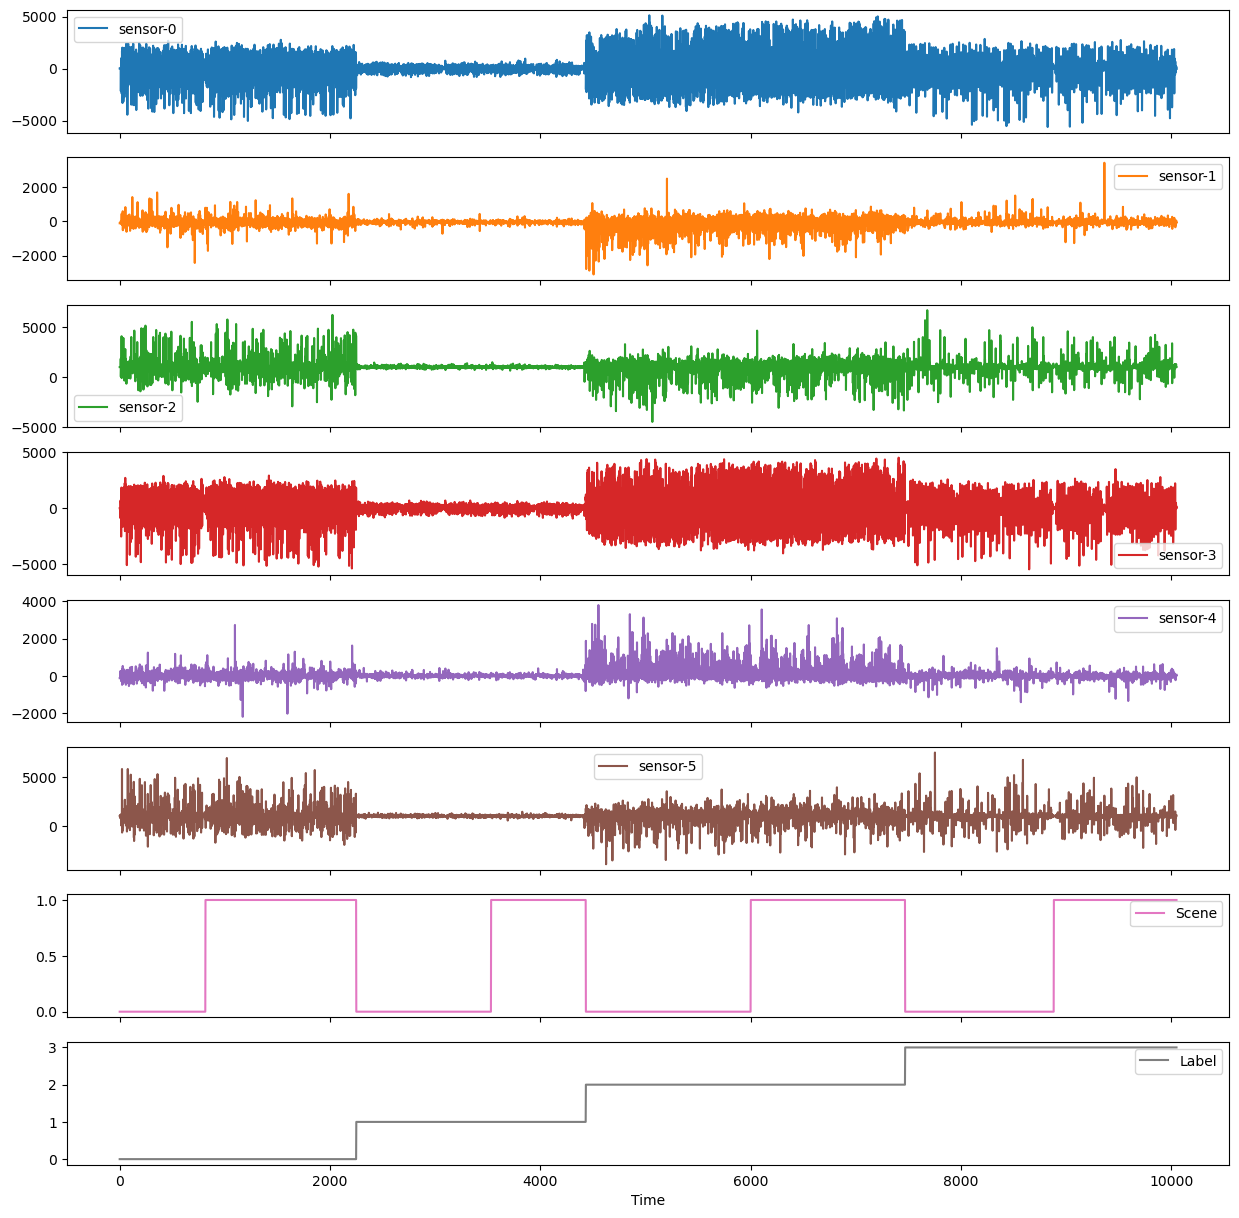

In [7]:
def prinUserSensorMatrix(S,L,Y):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    
    for t in range(0,X.shape[0]):
        ts.append(t)
    df['Time']=ts
    #print(ts)
    for s in range(0,X.shape[2]):
        ls.append("sensor-"+str(s))
        vs=S[:,:,s]
        vs=vs[:,0]
        print(vs.shape)
        df["sensor-"+str(s)]=vs
    

    
    ss=[]
    for t in range(0,X.shape[0]):
        ss.append(L[t])
    df['Scene']=ss
    ls.append('Scene')
    
    ys=[]
    for t in range(0,X.shape[0]):
        ys.append(Y[t])
    df['Label']=ys
    ls.append('Label')

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,15))    
    
prinUserSensorMatrix(X,S,Y)

In [8]:
print(X)       
print(X.shape)       

[[[ 7.53016529e+00 -1.05079640e+02  9.98590000e+02 -1.03822130e+01
   -1.23240654e+02  1.01314000e+03]
  [ 6.91484041e+00 -1.04602500e+02  9.98830000e+02 -1.00106294e+01
   -1.23744280e+02  1.01216500e+03]
  [ 7.98172360e+00 -1.03153692e+02  9.98590000e+02 -1.12849113e+01
   -1.23653020e+02  1.01362000e+03]
  ...
  [ 7.95514977e+00 -1.02338403e+02  9.99800000e+02 -8.95854733e+00
   -1.20722962e+02  1.01580500e+03]
  [ 8.41559030e+00 -1.02339822e+02  9.98830000e+02 -9.76115203e+00
   -1.20702718e+02  1.01532000e+03]
  [ 8.04970781e+00 -1.03796752e+02  9.99070000e+02 -9.55199339e+00
   -1.23625398e+02  1.01508000e+03]]

 [[ 7.95136840e+00 -1.03087942e+02  1.00101500e+03 -9.42270022e+00
   -1.22342111e+02  1.01556500e+03]
  [ 8.34279101e+00 -1.03282260e+02  1.00077000e+03 -1.02585870e+01
   -1.22962302e+02  1.01241000e+03]
  [ 8.18763471e+00 -1.05662206e+02  9.98590000e+02 -1.01346660e+01
   -1.23187844e+02  1.01580500e+03]
  ...
  [ 5.96584990e+00 -1.02260902e+02  9.97375000e+02 -1.07559

In [9]:
Y=to_categorical(Y)

In [10]:
print("nan:",np.argwhere(np.isnan(X)))
print(X[np.argwhere(np.isnan(X))])

nan: []
[]


In [11]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



classes=["B-Herringbone","B-Diagonal","B-DoublePoling","B-KickDoublePoling"]

Y_pred_total=np.array([])
Y_val_total=np.array([])

print("NUM SCENES:",np.unique(S))

for sceneid in np.unique(S):

    print("SCENE:",sceneid)
    index_test=np.where(S == sceneid)[0]
    index_train=np.where(S != sceneid)[0]

    print("index_test",index_test)
    print("index_train",index_train)

    x_train=X[index_train]
    x_val=X[index_test]
    y_train=Y[index_train]
    y_val=Y[index_test]

    #normalizamos valores (18 valores=6 señales imu x 3 sensores)
    for ixv in range(0,X.shape[2]):
        print(x_train[:,:,ixv])
        avg_v=np.nanmean(x_train[:,:,ixv].flatten())
        std_v=np.nanstd(x_train[:,:,ixv].flatten())
        print("avg_v,std_v:",avg_v,std_v)
        x_train[:,:,ixv]=(x_train[:,:,ixv]-avg_v)/(std_v)
        x_val[:,:,ixv]=(x_val[:,:,ixv]-avg_v)/(std_v)

    model = keras.Sequential()

    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(X.shape[1],X.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))

    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(256))

    model.add(Flatten())
    model.add(Dense(2048))
    model.add(Dense(1024))
    model.add(Dense(len(classes), activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
    model.summary()

    history = model.fit(x_train , y_train,
                        batch_size=64,
                validation_data=(x_val,y_val),
                epochs=25)


    y_pred = model.predict(x_val).argmax(axis=1)
    y_val=y_val.argmax(axis=1)
    print(y_pred)
    print(y_val)
    Y_pred_total=np.concatenate((Y_pred_total,y_pred))
    Y_val_total=np.concatenate((Y_val_total,y_val))

    

    

SCENE: 0
index_test [   0    1    2 ... 8879 8880 8881]
index_train [  815   816   817 ... 10047 10048 10049]
[[ 437.80557073  167.95051273  174.08454301 ...  207.15671971
    17.90728427  -59.84129282]
 [ 413.38768113  486.51836526  600.26795377 ...  -16.26246907
   382.29470643  521.19188049]
 [ 217.39666625  264.6776588   645.80236307 ... -135.85009373
  -155.88152285  -31.64552806]
 ...
 [ 190.50608682  228.35723312  190.20082018 ...  277.8923544
   277.8923544   973.31944306]
 [  64.22247122  133.39502607  136.73524065 ...  107.1261055
    55.58736875  306.35390411]
 [ -40.76363395  -38.32912573   36.15217928 ...  357.16720421
   540.7241347   608.81076617]]
avg_v,std_v: 19.300139380205163 1325.4240051066568
[[-319.79454154  -38.18344105   69.0068832  ...  -66.24121145
   -86.5137754    47.18517699]
 [-360.47091389 -323.38962532 -299.74170026 ...   52.00971289
   160.28368764  -48.01938755]
 [-327.37337031 -333.12110001 -309.52861833 ...  -74.77866111
   -72.39769876   51.05001981

80/80 [==============================] - 47s 585ms/step - loss: 0.1129 - accuracy: 0.9872 - val_loss: 0.0769 - val_accuracy: 0.9811
Epoch 12/25
80/80 [==============================] - 44s 550ms/step - loss: 0.0727 - accuracy: 0.9864 - val_loss: 0.0750 - val_accuracy: 0.9855
Epoch 13/25
80/80 [==============================] - 45s 569ms/step - loss: 0.0308 - accuracy: 0.9933 - val_loss: 0.0704 - val_accuracy: 0.9827
Epoch 14/25
80/80 [==============================] - 45s 564ms/step - loss: 0.0143 - accuracy: 0.9949 - val_loss: 0.1180 - val_accuracy: 0.9811
Epoch 15/25
80/80 [==============================] - 45s 558ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.1585 - val_accuracy: 0.9678
Epoch 16/25
80/80 [==============================] - 32s 399ms/step - loss: 0.0675 - accuracy: 0.9858 - val_loss: 0.1468 - val_accuracy: 0.9740
Epoch 17/25
80/80 [==============================] - 44s 552ms/step - loss: 0.0298 - accuracy: 0.9935 - val_loss: 0.1574 - val_accuracy: 0.9781
Epoc

[3. 3. 3. ... 3. 3. 3.]
[0. 0. 0. ... 3. 3. 3.]
[[2178   11   32   28]
 [   0 2165    0   18]
 [   0    0 3036    0]
 [  36   31    4 2511]]
Classification Report TOTAL
                    precision    recall  f1-score   support

     B-Herringbone       0.98      0.97      0.98      2249
        B-Diagonal       0.98      0.99      0.99      2183
    B-DoublePoling       0.99      1.00      0.99      3036
B-KickDoublePoling       0.98      0.97      0.98      2582

          accuracy                           0.98     10050
         macro avg       0.98      0.98      0.98     10050
      weighted avg       0.98      0.98      0.98     10050



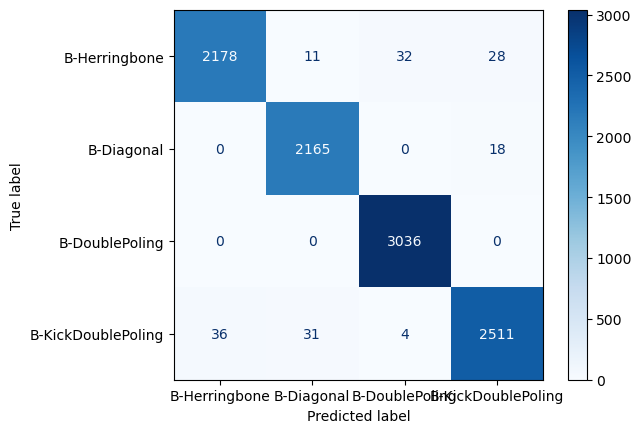

In [12]:
print(Y_pred_total)
print(Y_val_total)

cm = confusion_matrix(Y_val_total, Y_pred_total) 
print(cm)
print('Classification Report TOTAL')
print(classification_report(Y_val_total, Y_pred_total, target_names=classes))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()